# pizza sales revenue analysis 
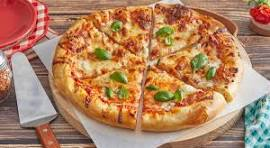

## importing library 

In [133]:
!pip install -q scikit-learn

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

## importing csv dataset 

In [36]:
df=pd.read_csv("pizza sales")
df = df.drop(df.columns[0], axis=1)

# Data processing & information 

In [38]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [113]:
df.count()

pizza_id             48620
order_id             48620
pizza_name_id        48620
quantity             48620
order_date           48620
order_time           48620
unit_price           48620
total_price          48620
pizza_size           48620
pizza_category       48620
pizza_ingredients    48620
pizza_name           48620
dtype: int64

In [41]:
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [42]:
df.dtypes

pizza_id               int64
order_id               int64
pizza_name_id         object
quantity               int64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object

In [48]:
df.shape

(48620, 12)

In [54]:
df.tail()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
48619,48620,21350,bbq_ckn_s,1,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


# KPI calculations 

## Total revenue

In [107]:
total_revenue = df["total_price"].sum()

print(f"Total Revenue: ${total_revenue}")

Total Revenue: $817860.05


## Average_order_value

In [106]:
average_order_value = df['total_price'].sum() / df['order_id'].nunique()

print("Average Order Value:", average_order_value)


Average Order Value: 38.30726229508197


## Average pizza sold

In [105]:
avg_pizza_sold = df["quantity"].sum()

print(f"Average pizza sold:{avg_pizza_sold}")

Average pizza sold:49574


## Total_orders

In [104]:
total_orders = df["order_id"].nunique()

print("Total orders", total_orders)

Total orders 21350


## Average pizzas per order

In [103]:
avg_pizza_per_order = df['quantity'].sum() / df['order_id'].nunique()

avg_pizza_per_order = round(avg_pizza_per_order, 2) 

print("Average Pizza Per Order:", avg_pizza_per_order)


Average Pizza Per Order: 2.32


## Day wise order trends 

In [85]:
df['order_date'] = pd.to_datetime(df['order_date'])

daywise_orders = df.groupby(df['order_date'].dt.strftime('%A'))['order_id'].nunique().reset_index()
daywise_orders.columns = ['Day', 'Total_Orders']

print(daywise_orders)


         Day  Total_Orders
0     Friday          3538
1     Monday          2794
2   Saturday          3158
3     Sunday          2624
4   Thursday          3239
5    Tuesday          2973
6  Wednesday          3024


## Monthly trends of orders

In [88]:
df['order_date'] = pd.to_datetime(df['order_date'])

monthly_orders = df.groupby(df['order_date'].dt.strftime('%B'))['order_id'].nunique().reset_index()
monthly_orders.columns = ['Month', 'Total_Orders']

print(monthly_orders)


        Month  Total_Orders
0       April          1799
1      August          1841
2    December          1680
3    February          1685
4     January          1845
5        July          1935
6        June          1773
7       March          1840
8         May          1853
9    November          1792
10    October          1646
11  September          1661


## Percentage of sales by pizza category 

In [93]:
sales_per_category = df.groupby('pizza_category')['total_price'].sum().reset_index()
sales_per_category.columns = ['pizza_category', 'total_sales']

sales_per_category['percentage_of_sales'] = (sales_per_category['total_sales'] / sales_per_category['total_sales'].sum()) * 100

print("Percentage of Sales per Pizza Category:")
print(sales_per_category)


Percentage of Sales per Pizza Category:
  pizza_category  total_sales  percentage_of_sales
0        Chicken    195919.50            23.955138
1        Classic    220053.10            26.905960
2        Supreme    208197.00            25.456311
3         Veggie    193690.45            23.682591


## Percentage of sales by pizza size

In [94]:
df['order_date'] = pd.to_datetime(df['order_date'])

q1_data = df[df['order_date'].dt.quarter == 1]

grouped_q1 = q1_data.groupby('pizza_size').agg(total_revenue=('total_price', 'sum'))

total_sales_q1 = grouped_q1['total_revenue'] * 100 / grouped_q1['total_revenue'].sum()
grouped_q1['total_sales'] = total_sales_q1.round(2)

result = grouped_q1.sort_values(by='total_sales', ascending=False)
print(result)


            total_revenue  total_sales
pizza_size                            
L                95229.65        46.37
M                61159.00        29.78
S                45384.25        22.10
XL                3289.50         1.60
XXL                287.60         0.14


## top 5 best pizza

In [112]:
revenue_per_pizza = df.groupby("pizza_name")["total_price"].sum().reset_index()

top_5_pizzas = revenue_per_pizza.nlargest(5,'total_price')

print(top_5_pizzas)

                      pizza_name  total_price
30        The Thai Chicken Pizza     43434.25
0     The Barbecue Chicken Pizza     42768.00
4   The California Chicken Pizza     41409.50
7       The Classic Deluxe Pizza     38180.50
26       The Spicy Italian Pizza     34831.25


## top 5 bottom pizza

In [102]:
revenue_per_pizza = df.groupby('pizza_name')['total_price'].sum().reset_index()

bottom_5_pizzas = revenue_per_pizza.nsmallest(5, 'total_price')

print(bottom_5_pizzas)


                   pizza_name  total_price
2        The Brie Carre Pizza     11588.50
11     The Green Garden Pizza     13955.75
28  The Spinach Supreme Pizza     15277.75
16    The Mediterranean Pizza     15360.50
27    The Spinach Pesto Pizza     15596.00


# data visualization 

## Number of orders over time

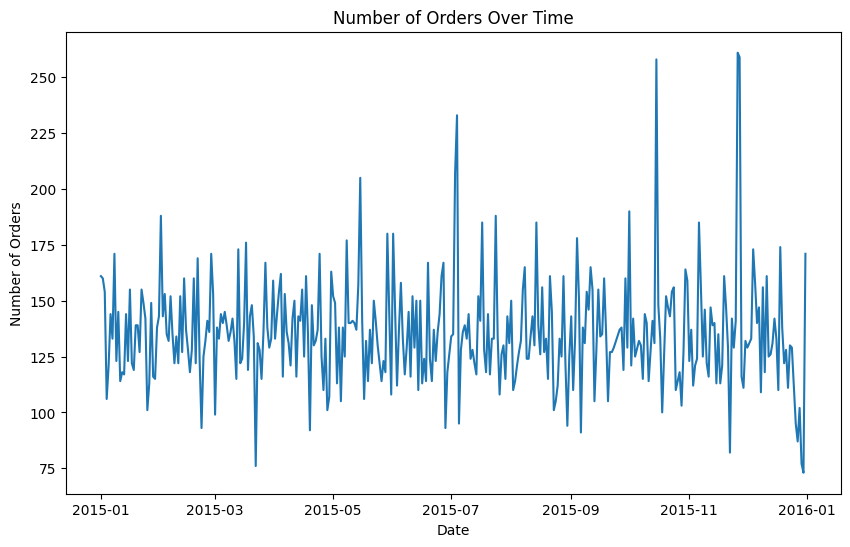

In [115]:
plt.figure(figsize=(10, 6))
plt.plot(orders_per_date.index, orders_per_date.values)
plt.title('Number of Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.show()

## Percentage of pizza sales

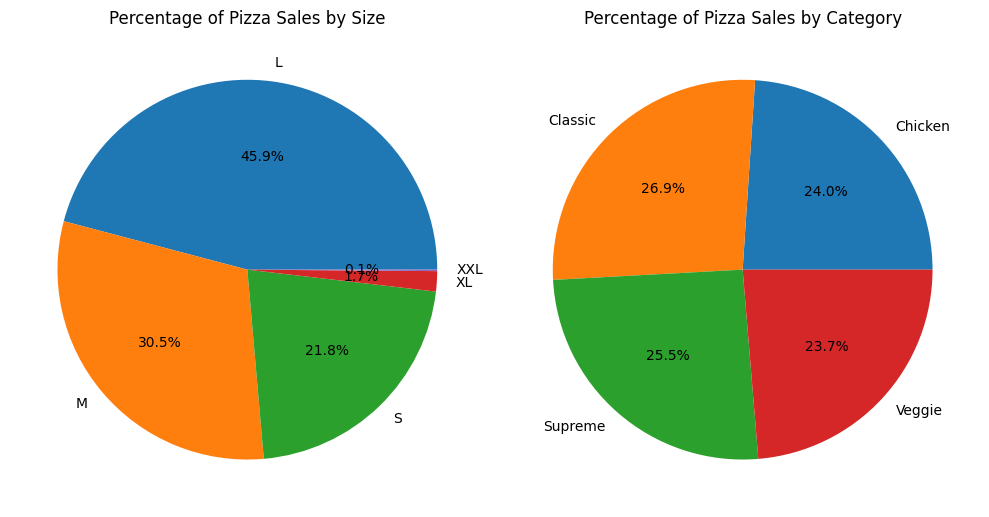

In [117]:
sales_by_size = df.groupby('pizza_size')['total_price'].sum()
sales_by_category = df.groupby('pizza_category')['total_price'].sum()

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1) 
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%')
plt.title('Percentage of Pizza Sales by Size')

plt.subplot(1, 2, 2) 
plt.pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%')
plt.title('Percentage of Pizza Sales by Category')

plt.tight_layout()  
plt.show()


## daywise and monthwise trends by total orders 

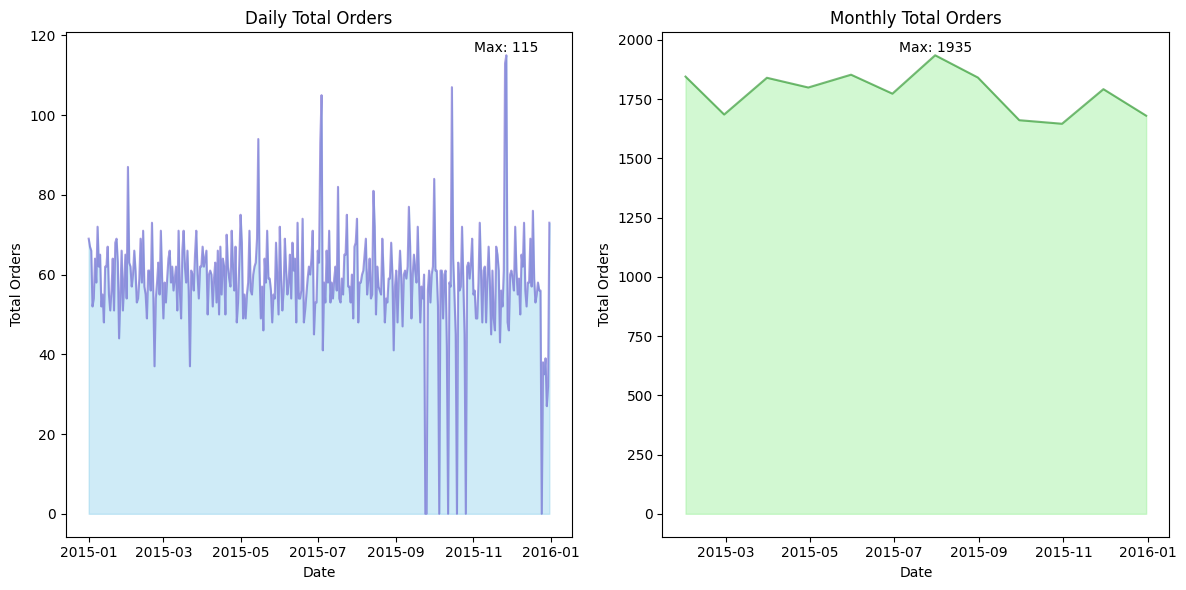

In [120]:
df['order_date'] = pd.to_datetime(df['order_date'])

daily_orders = df.resample('D', on='order_date').order_id.nunique()

monthly_orders = df.resample('M', on='order_date').order_id.nunique()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.fill_between(daily_orders.index, daily_orders.values, color='skyblue', alpha=0.4)
plt.plot(daily_orders.index, daily_orders.values, color='Slateblue', alpha=0.6)
plt.title('Daily Total Orders')
plt.xlabel('Date')
plt.ylabel('Total Orders')
plt.text(daily_orders.idxmax(), daily_orders.max(), f"Max: {daily_orders.max()}", ha='center', va='bottom')

plt.subplot(1, 2, 2)
plt.fill_between(monthly_orders.index, monthly_orders.values, color='lightgreen', alpha=0.4)
plt.plot(monthly_orders.index, monthly_orders.values, color='forestgreen', alpha=0.6)
plt.title('Monthly Total Orders')
plt.xlabel('Date')
plt.ylabel('Total Orders')
plt.text(monthly_orders.idxmax(), monthly_orders.max(), f"Max: {monthly_orders.max()}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Top and bottom 5 pizza by revenue and quantity 

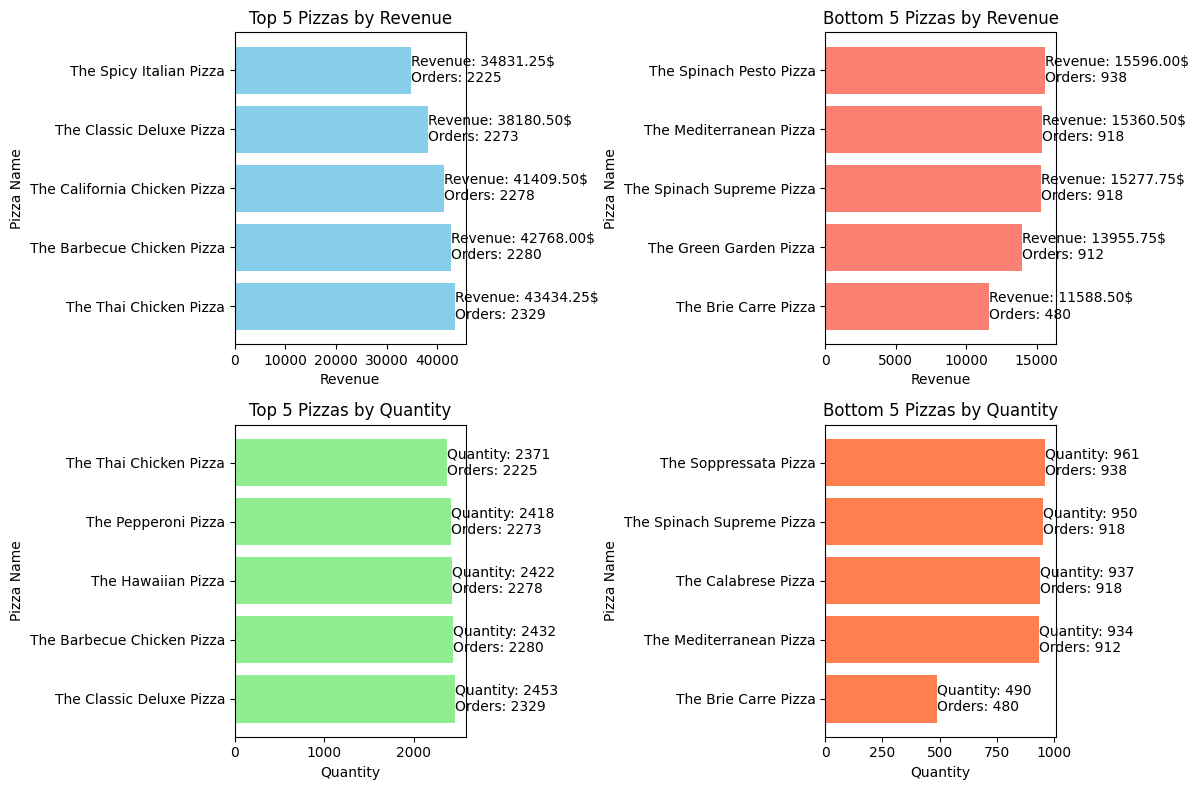

In [127]:
revenue_per_pizza = df.groupby('pizza_name')['total_price'].sum()
quantity_per_pizza = df.groupby('pizza_name')['quantity'].sum()
orders_per_pizza = df.groupby('pizza_name')['order_id'].nunique()

top_revenue_pizzas = revenue_per_pizza.nlargest(5)
bottom_revenue_pizzas = revenue_per_pizza.nsmallest(5)
top_quantity_pizzas = quantity_per_pizza.nlargest(5)
bottom_quantity_pizzas = quantity_per_pizza.nsmallest(5)
top_orders_pizzas = orders_per_pizza.nlargest(5)
bottom_orders_pizzas = orders_per_pizza.nsmallest(5)

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].barh(top_revenue_pizzas.index, top_revenue_pizzas.values, color='skyblue')
axs[0, 0].set_title('Top 5 Pizzas by Revenue')
axs[0, 0].set_xlabel('Revenue')
axs[0, 0].set_ylabel('Pizza Name')
for i, (value, orders) in enumerate(zip(top_revenue_pizzas.values, top_orders_pizzas)):
    axs[0, 0].text(value, i, f'Revenue: {value:.2f}$\nOrders: {orders}', va='center')

axs[0, 1].barh(bottom_revenue_pizzas.index, bottom_revenue_pizzas.values, color='salmon')
axs[0, 1].set_title('Bottom 5 Pizzas by Revenue')
axs[0, 1].set_xlabel('Revenue')
axs[0, 1].set_ylabel('Pizza Name')
for i, (value, orders) in enumerate(zip(bottom_revenue_pizzas.values, bottom_orders_pizzas)):
    axs[0, 1].text(value, i, f'Revenue: {value:.2f}$\nOrders: {orders}', va='center')

axs[1, 0].barh(top_quantity_pizzas.index, top_quantity_pizzas.values, color='lightgreen')
axs[1, 0].set_title('Top 5 Pizzas by Quantity')
axs[1, 0].set_xlabel('Quantity')
axs[1, 0].set_ylabel('Pizza Name')
for i, (value, orders) in enumerate(zip(top_quantity_pizzas.values, top_orders_pizzas)):
    axs[1, 0].text(value, i, f'Quantity: {value}\nOrders: {orders}', va='center')

axs[1, 1].barh(bottom_quantity_pizzas.index, bottom_quantity_pizzas.values, color='coral')
axs[1, 1].set_title('Bottom 5 Pizzas by Quantity')
axs[1, 1].set_xlabel('Quantity')
axs[1, 1].set_ylabel('Pizza Name')
for i, (value, orders) in enumerate(zip(bottom_quantity_pizzas.values, bottom_orders_pizzas)):
    axs[1, 1].text(value, i, f'Quantity: {value}\nOrders: {orders}', va='center')

plt.tight_layout()
plt.show()

## Top and bottom 5 pizza by order

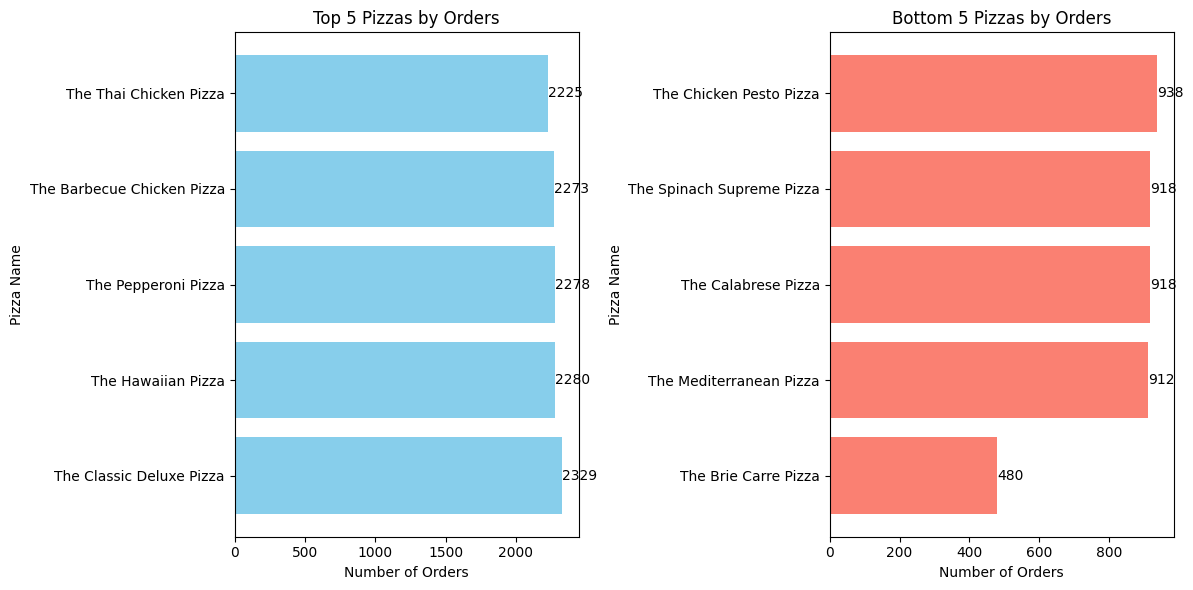

In [128]:
orders_per_pizza = df.groupby('pizza_name')['order_id'].nunique()

top_orders_pizzas = orders_per_pizza.nlargest(5)
bottom_orders_pizzas = orders_per_pizza.nsmallest(5)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].barh(top_orders_pizzas.index, top_orders_pizzas.values, color='skyblue')
axs[0].set_title('Top 5 Pizzas by Orders')
axs[0].set_xlabel('Number of Orders')
axs[0].set_ylabel('Pizza Name')
for i, v in enumerate(top_orders_pizzas.values):
    axs[0].text(v, i, str(v), ha='left', va='center')

axs[1].barh(bottom_orders_pizzas.index, bottom_orders_pizzas.values, color='salmon')
axs[1].set_title('Bottom 5 Pizzas by Orders')
axs[1].set_xlabel('Number of Orders')
axs[1].set_ylabel('Pizza Name')
for i, v in enumerate(bottom_orders_pizzas.values):
    axs[1].text(v, i, str(v), ha='left', va='center')

plt.tight_layout()
plt.show()

# machine learning model 

This Random Forest Regressor model to predict   **total_price** based on the features **quantity, unit_price, pizza_size, and pizza_category**.   It encodes categorical variables, splits the data into training and testing sets, trains the model,   makes predictions on the test set, and evaluates the model using Mean Squared Error (MSE).

In [139]:
features = ['quantity', 'unit_price', 'pizza_size', 'pizza_category']
target = 'total_price'

X = df[features]
y = df[target]

label_encoder = LabelEncoder()
X.loc[:, 'pizza_size'] = label_encoder.fit_transform(X['pizza_size'])
X = pd.get_dummies(X, columns=['pizza_category'], prefix='pizza_cat')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print('''a lower MSE generally indicates better model performance''')

Mean Squared Error: 0.003576746323529412
a lower MSE generally indicates better model performance


In [154]:
df.columns.tolist()

['pizza_id',
 'order_id',
 'pizza_name_id',
 'quantity',
 'order_date',
 'order_time',
 'unit_price',
 'total_price',
 'pizza_size',
 'pizza_category',
 'pizza_ingredients',
 'pizza_name']

In [155]:
df.head(2)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza


In [153]:
features = ['pizza_size']
target = 'pizza_category'

X = df[features]
y = df[target]

# Encoding categorical variables
label_encoder = LabelEncoder()
X['pizza_size'] = label_encoder.fit_transform(X['pizza_size'])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluate the model (e.g., classification report, accuracy, etc.)
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

     Chicken       0.00      0.00      0.00      2155
     Classic       0.36      0.73      0.48      2935
     Supreme       0.00      0.00      0.00      2357
      Veggie       0.28      0.46      0.35      2277

    accuracy                           0.33      9724
   macro avg       0.16      0.30      0.21      9724
weighted avg       0.17      0.33      0.23      9724

Accuracy: 0.3283628136569313
